# Центральная предельная теорема. 

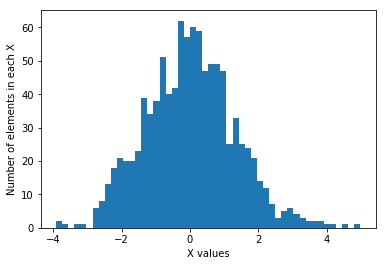

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
number_of_sums = 1000
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Изменение данных с помощью матрицы ковариаций

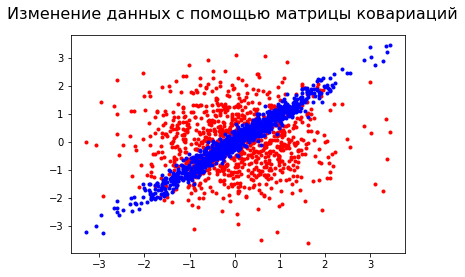

In [2]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Разброс данных 2 способами: теоритически и практически

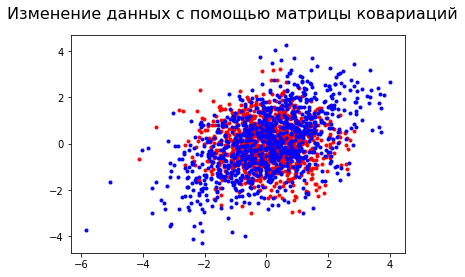

In [3]:
import numpy.linalg as la
n = 1000
C = [[2,1],[1,2]]
A = la.cholesky(C)
X = np.random.randn(n,2)
# Y - измененные значения X
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16) 
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

Второй метод генерации данных

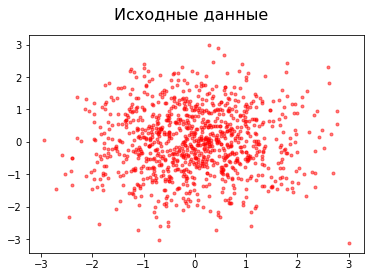

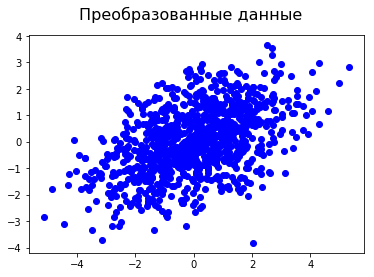

In [4]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = np.matrix('2 1; 1 2')
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.show()

Проецируем данные на вектор, разброс:

In [6]:
import math
i = 45
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  3.1759869210003
теоритический подсчет:  [[2.89399666]]


Как меняется вариация в зависимости от выбора собственного вектора

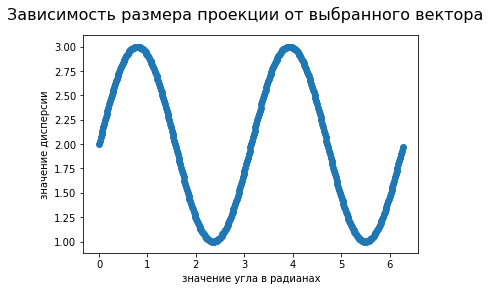

In [7]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# Чистые данные

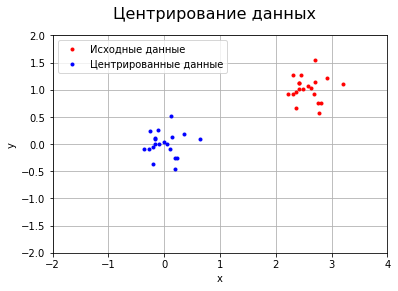

In [8]:
def mean_centering(X):
    mu = np.mean(X, axis=0)
    return X- np.ones((X.shape[0],2))*mu
n=20
mu = [2.5, 1]
mu_add = np.ones((n,2))*mu
Xa = np.random.randn(n,2)*0.25
Xa = Xa + mu_add
Ya = mean_centering(Xa)
plt.suptitle('Центрирование данных', fontsize=16)  
plt.plot(Xa[:,0], Xa[:,1], 'r.')
plt.plot(Ya[:,0], Ya[:,1], 'b.')
plt.legend(['Исходные данные','Центрированные данные'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-2,4,-2,2])
plt.grid()

# Поиск собственного вектора

1.7000000000000002 [0.70710678 0.70710678]


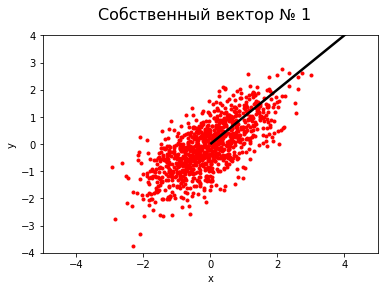

0.30000000000000016 [-0.70710678  0.70710678]


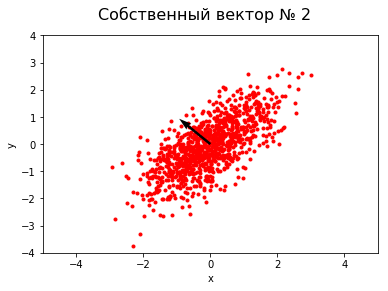

In [19]:
import numpy.linalg as la
n=1000
Cb = [[1,0.7],[0.7,1]]
Ab = la.cholesky(Cb)
Xb = np.random.randn(n,2)
Yb = np.dot(Ab,Xb.T)
w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(2.5/w[i]), zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

Проекция на ось X

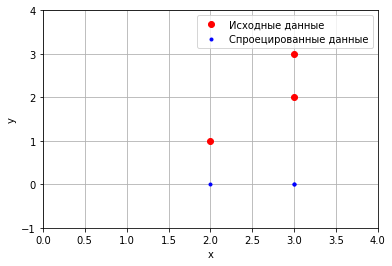

In [20]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[1,0],[0,0]]) # проекция на ось x
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,-1,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

Проецирование на прямую

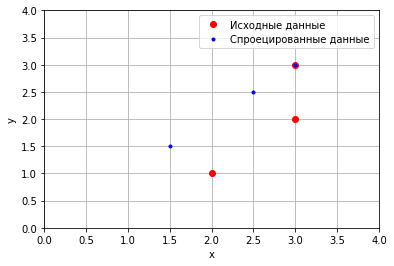

In [39]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[.5,.5],[.5,.5]]) # проецирование на прямую x=y
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Пример поиска собственных векторов

Сортируем вектора в порядке убывания

In [12]:
Xe = np.array([[2,1],[3,2],[3,3]])
X_mc = mean_centering(Xe)
Z = np.dot(X_mc.T,X_mc); w,v = la.eig(Z)
idx = w.argsort()[::-1]   
w = w[idx]; v = v[:,idx]

2.5351837584879964 [-0.47185793 -0.8816746 ]


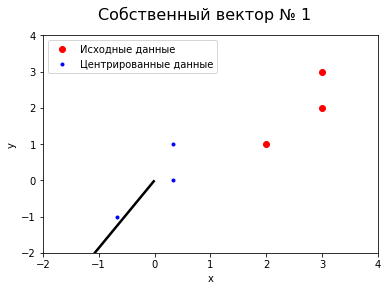

0.13148290817867014 [-0.8816746   0.47185793]


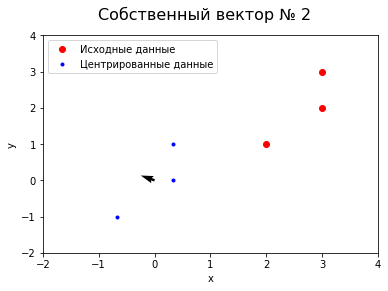

In [13]:
for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)
    plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
    plt.plot(X_mc[:,0], X_mc[:,1], 'b.', label="Центрированные данные")
    plt.axis([-2,4,-2,4]); plt.legend(); print(w[i], v[:,i])
    plt.xlabel('x')
    plt.ylabel('y')    
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(3/w[i]), zorder=2); plt.show()

Пример проекции на вектор

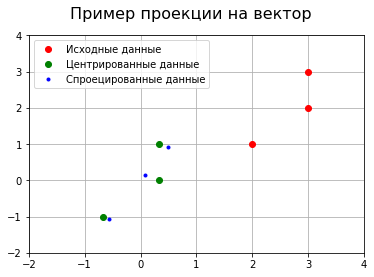

In [14]:
pa =v[:,0]
projection_matrix = np.outer(pa,pa.T) #P = aa^T чтобы спроецировать по вектору a
Xp = np.dot(Xe, projection_matrix)
Xp = mean_centering(Xp)
plt.suptitle('Пример проекции на вектор', fontsize=16)
plt.plot(Xe[:,0], Xe[:,1], 'ro', label="Исходные данные")
plt.plot(X_mc[:,0], X_mc[:,1], 'go', label="Центрированные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([-2,4,-2,4])
plt.grid()
plt.legend()

# Теория вероятности

Парадокс мальчика и девочки

In [18]:
#произвольно выбрать мальчика или девочку
def random_kid():
	return np.random.choice(["boy", "girl"])

#проверка парадокса мальчика и девочки
both_girls = 0
older_girl = 0
either_girl = 0

np.random.seed(0)
for _ in range(10000):	# провести эксперимент на совокупности
						# из 10000 семей
	younger = random_kid()
	older = random_kid()
	if older == "girl":							# старшая?
		older_girl += 1
	if older == "girl" and younger == "girl":	# обе?
		both_girls += 1
	if older == "girl" or younger == "girl":	# любая из двух?
		either_girl += 1
		
print("P(обе | старшая):", both_girls / older_girl)	# 0.514 ~ 1/2
print("P(обе | любая):", both_girls / either_girl)	# 0.342 ~ 1/3

						

P(обе | старшая): 0.4976190476190476
P(обе | любая): 0.3318777292576419
